***Fundamentals of Solar Cells and Photovoltaic Systems Engineering***

**Solutions Manual - Chapter 3**

***Problem 3.4***


***(a) Calculate and plot the reflectance $r$ at the front surface of a silicon solar cell as a function of the photon wavelength.***

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data.

In [3]:
datafile = pd.read_csv('data/Refractive index silicon.csv', index_col=0, header=0) 
datafile

,n_Si_25C
nm,NaN
250,1.6640
260,1.7540
270,2.0870
280,2.9610
...,...
1410,3.4928
1420,3.4917
1430,3.4906
1440,3.4896


In [4]:
datafile.drop(datafile.index[0], inplace=True) #remove row including information on units
datafile=datafile.astype(float) #convert values to float for easy operation
datafile.index=datafile.index.astype(float) #convert indexees to float for easy operation

We visualize the refectrative index spectra.

Text(0.5, 0, 'Wavelength, $\\lambda$ (nm)')

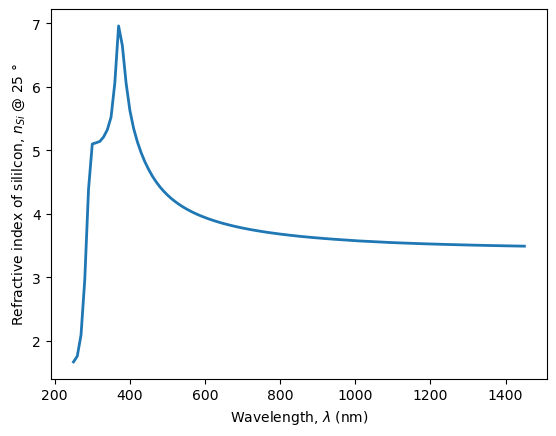

In [17]:
plt.plot(datafile, 
         linewidth=2)
plt.ylabel(r'Refractive index of sililcon, $n_{Si}$ @ 25 $\degree$')
plt.xlabel('Wavelength, $\lambda$ (nm)')

We calculate the reflectance at the air/silicon interface, using Eq. 3.3, and plot it.

$r=[\frac{(n_{Si}-1)}{(n_{Si}+1)}]^2$

Text(0.5, 0, 'Wavelength, $\\lambda$ (nm)')

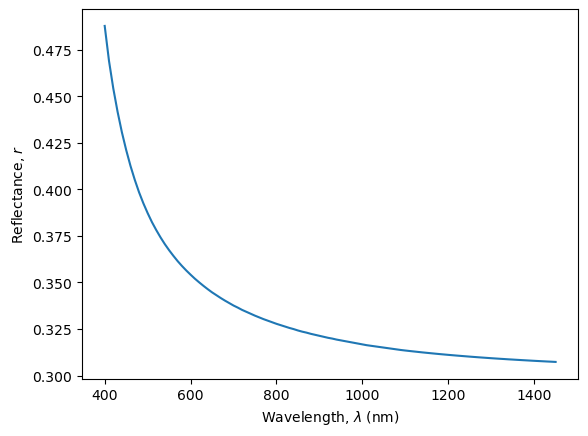

In [16]:
n=datafile['n_Si_25C'][datafile.index>=400]
r=((n-1)/(n+1))**2
plt.plot(r)
plt.ylabel(r'Reflectance, $r$')
plt.xlabel('Wavelength, $\lambda$ (nm)')

***(b) Assuming that the QE of a given silicon solar cell is ideal except for the reflection losses, plot the QE and discuss how it affects the production of photocurrent.***

The ideal QE is 1 for wavelengths shorter than the bandgap wavelenght $\lambda_g$ and 0 for longer wavelengths.

In [11]:
bg_wl=1240/1.12
QEone=lambda x: 1 if x < bg_wl else 0
ideal_QE=pd.Series(index=r.index,
                   data=[QEone(i) for i in r.index])

To account for the reflection losses, the ideal QE is multiplied by (1-$r$)

In [12]:
QE_ref_loss=pd.Series(index=ideal_QE.index,
                    data=[(1-r.loc[i])*ideal_QE.loc[i] for i in ideal_QE.index])

We plot the ideal QE and the actual QE (affected by $r$)

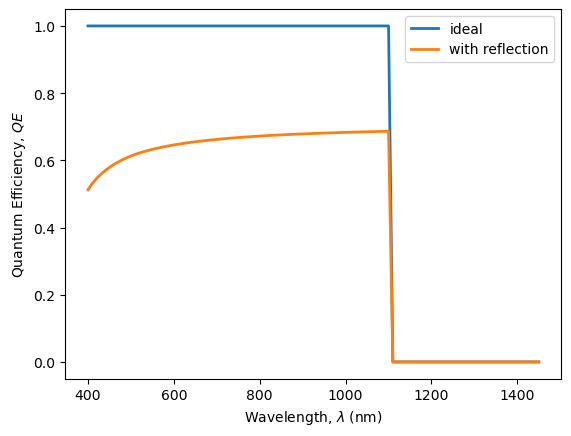

In [15]:
plt.plot(ideal_QE,
         linewidth=2, label='ideal')
plt.plot(QE_ref_loss,
         linewidth=2, label='with reflection')

plt.ylabel(r'Quantum Efficiency, $QE$')
plt.xlabel('Wavelength, $\lambda$ (nm)')
plt.legend()

First, we need to interpolate the spectra at those datapoints included in the SR. 

MAYBE INCLUDE HERE porblem 3.5 as 3.4 (c)